In [1]:
import torch.nn as nn
import pandas as pd
import torch
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

In [2]:
# Visualization tools
import torchvision
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [4]:
train_set = torchvision.datasets.MNIST("./data/", train=True, download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False, download=True)

In [5]:
train_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train

In [6]:
valid_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test

In [7]:
x_0, y_0 = train_set[0]

In [8]:
x_0

In [9]:
y_0

5

In [10]:
type(x_0)
print(x_0.size)  


(28, 28)


# Tensores


In [11]:
trans = transforms.Compose([transforms.ToTensor()])

c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [12]:
train_set.transform = trans
valid_set.transform = trans 

### Data loader
MINST ya es como tal un dataset

In [13]:
BATCH_SIZE = 32

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=BATCH_SIZE, shuffle=False)

In [14]:
batch = next(iter(train_loader))
batch

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [15]:
x_batch, y_batch = batch

print(x_batch.shape) #32 imágenes de 28x28 píxeles (con 1 canal).
print(y_batch.shape) # 32 etiquetas.

torch.Size([32, 1, 28, 28])
torch.Size([32])


### Creacion del modelo convolucional


In [16]:
n_classes = 10
kernel_size = 3 # cuadro de 3×3 píxeles.
#respecto a la capa densa (nn.Linear).
flattened_img_size = 75 * 3 * 3 #Al final la imagen es de 75 canales de tamaño 3×3

model = nn.Sequential(
    # First convolution
    nn.Conv2d(1, 25, kernel_size, stride=1, padding=1),  # 25 x 28 x 28
    nn.BatchNorm2d(25),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),  # 25 x 14 x 14
    # Second convolution
    nn.Conv2d(25, 50, kernel_size, stride=1, padding=1),  # 50 x 14 x 14
    nn.BatchNorm2d(50),
    nn.ReLU(),
    nn.Dropout(.2),
    nn.MaxPool2d(2, stride=2),  # 50 x 7 x 7
    # Third convolution
    nn.Conv2d(50, 75, kernel_size, stride=1, padding=1),  # 75 x 7 x 7
    nn.BatchNorm2d(75),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),  # 75 x 3 x 3
    # Flatten to Dense
    nn.Flatten(),
    nn.Linear(flattened_img_size, 512),
    nn.Dropout(.3),
    nn.ReLU(),
    nn.Linear(512, n_classes)
)

In [17]:
model = torch.compile(model.to(device))
model

OptimizedModule(
  (_orig_mod): Sequential(
    (0): Conv2d(1, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(25, 50, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(50, 75, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(75, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Linear(in_features=675, out_features=512, bias=True)
    (15): Dropout

In [18]:
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

In [19]:
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

### Entrenamiento del modelo

In [20]:
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, len(valid_loader.dataset))
    print('VALID - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [21]:
def train():
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, len(train_loader.dataset))
    print('TRAIN - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [22]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

epochs = 2

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0


W0430 22:26:49.916000 2376 site-packages\torch\_dynamo\convert_frame.py:1280] WON'T CONVERT inner c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\_dynamo\external_utils.py line 68 
W0430 22:26:49.916000 2376 site-packages\torch\_dynamo\convert_frame.py:1280] due to: 
W0430 22:26:49.916000 2376 site-packages\torch\_dynamo\convert_frame.py:1280] Traceback (most recent call last):
W0430 22:26:49.916000 2376 site-packages\torch\_dynamo\convert_frame.py:1280]   File "c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\_dynamo\convert_frame.py", line 1213, in __call__
W0430 22:26:49.916000 2376 site-packages\torch\_dynamo\convert_frame.py:1280]     result = self._inner_convert(
W0430 22:26:49.916000 2376 site-packages\torch\_dynamo\convert_frame.py:1280]         frame, cache_entry, hooks, frame_state, skip=skip + 1
W0430 22:26:49.916000 2376 site-packages\torch\_dynamo\convert_frame.py:1280]     )
W0430 22:26:49.916000 2376 site-packa

TRAIN - Loss: 221.1490 Accuracy: 0.9634
VALID - Loss: 14.7433 Accuracy: 0.9850
Epoch: 1
TRAIN - Loss: 92.1826 Accuracy: 0.9845
VALID - Loss: 16.3566 Accuracy: 0.9835


## Teste con Imagenes Normales


In [24]:
import os

folder_path = "normal"  # Como está en la misma carpeta que cnn.py

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
print("Imágenes encontradas:", image_files)


Imágenes encontradas: ['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png']


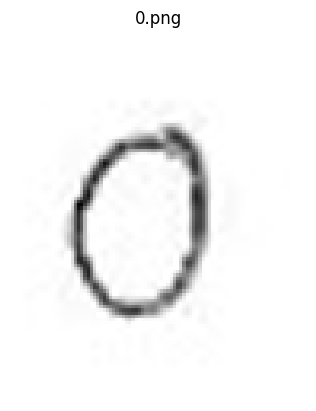

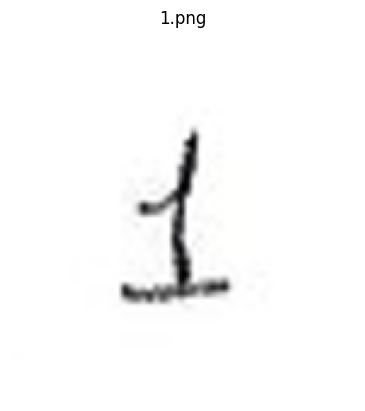

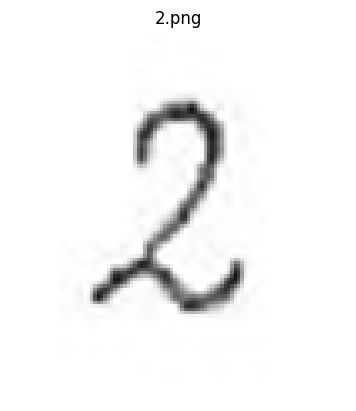

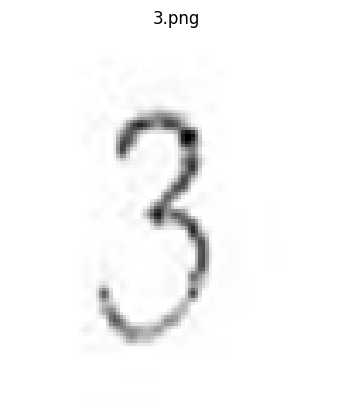

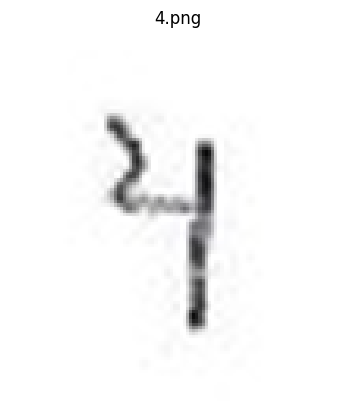

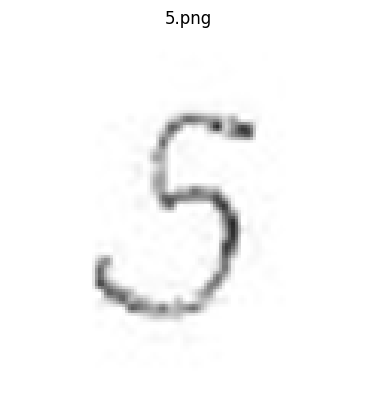

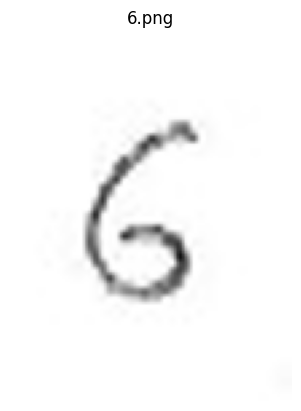

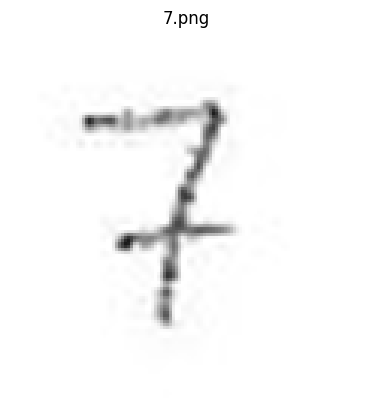

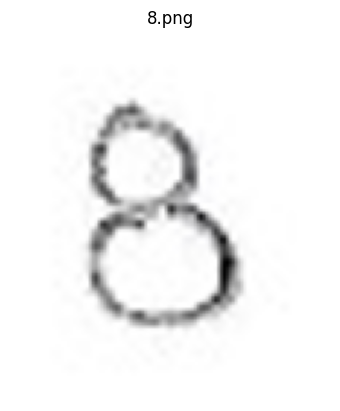

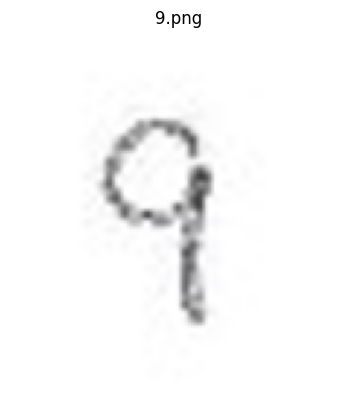

In [25]:
import matplotlib.pyplot as plt
from PIL import Image

for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)

    plt.imshow(img)  # Usa 'gray' si son blanco y negro
    plt.title(img_file)
    plt.axis('off')
    plt.show()

In [26]:
# remodelar nuestro conjunto de datos para que tengan un formato de 28x28 píxeles
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
    transforms.Lambda(lambda x: 1 - x),
])

c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [27]:
image_path = os.path.join(folder_path, image_files[9])
image1 = transform(Image.open(image_path))

Shape del tensor: torch.Size([1, 28, 28])


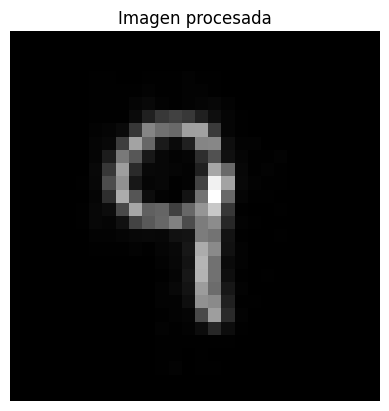

In [28]:
# .squeeze() elimina esa primera dimensión (el canal) dejando solo [28, 28].
print("Shape del tensor:", image1.shape)
plt.imshow(image1.squeeze(), cmap='gray')
plt.title("Imagen procesada")
plt.axis("off")
plt.show()

In [29]:
#me dio error entonces simulo un un batch de una sola imagen
image1 = image1.unsqueeze(0)
prediction = model(image1)
prediction

tensor([[-5.0496, -0.6787, -3.2811, -4.2680,  2.4845, -4.1996, -5.7803, -0.5752,
          0.8586,  4.7115]], grad_fn=<AddmmBackward0>)

In [30]:
prediction.argmax(dim=1, keepdim=True)

tensor([[9]])

### funcion para predecir desde una ruta

In [ ]:
import torch.nn.functional as F

In [40]:
## Funcion para predecir desde una ruta
def predecir_desde_ruta(image_path: str, model):

    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
        transforms.Lambda(lambda x: 1 - x),
    ])
    
    img = Image.open(image_path)
    img_tensor = transform(img).unsqueeze(0)  

    model.eval()
    with torch.no_grad():
        salida = model(img_tensor)
        probs = F.softmax(salida, dim=1).squeeze().numpy()
        pred_clase = probs.argmax()
    
    print(f"Imagen: {image_path}")
    print(f"Clase predicha: {pred_clase}")
    print(f"Distribución de probabilidades: {probs}")

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.title("Imagen original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.bar(range(10), probs)
    plt.xticks(range(10))
    plt.xlabel("Clases")
    plt.ylabel("Probabilidad")
    plt.title("Distribución de salida del modelo")

    plt.tight_layout()
    plt.show()
    

# Imágenes de digitos escritos a mano (x10).

Imagen del Numero 0

Imagen: normal/0.png
Clase predicha: 0
Distribución de probabilidades: [8.8506329e-01 2.8911856e-07 6.9950722e-05 1.4063121e-04 3.1008080e-05
 8.3248400e-05 4.6570836e-05 8.0623126e-05 3.4023297e-04 1.1414412e-01]


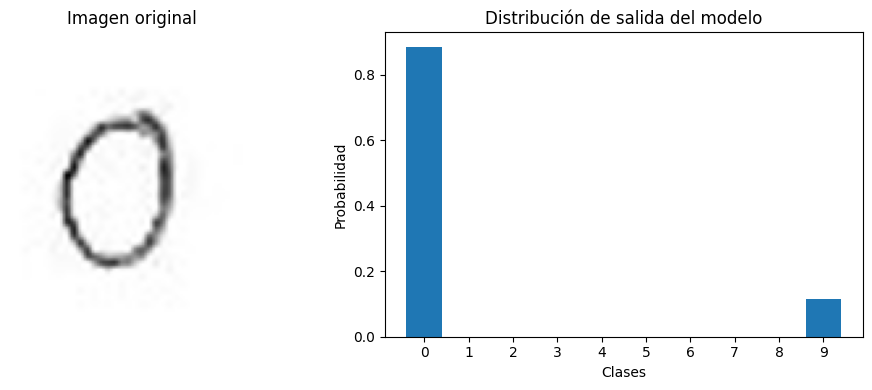

In [43]:
predecir_desde_ruta("normal/0.png", model)

Comentario : El modelo infirio con una alta probabilidad de 88.51% que se trataba de un 0 a diferencia del resto de clases.

Imagen del Numero 1

Imagen: normal/1.png
Clase predicha: 1
Distribución de probabilidades: [6.1137939e-04 7.3092300e-01 1.3001833e-02 4.6110232e-03 1.5451030e-01
 2.3435829e-03 8.8972934e-02 9.7980781e-04 2.8797796e-03 1.1662723e-03]


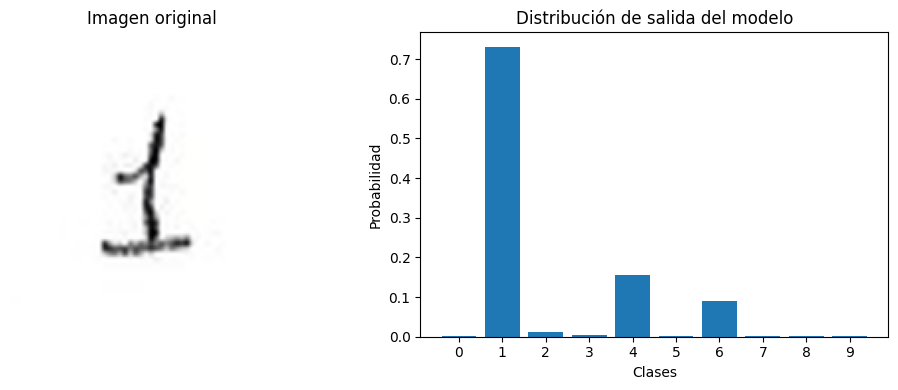

In [42]:
predecir_desde_ruta("normal/1.png", model)


Comentario : El modelo infirio con una alta probabilidad de 73.09% que se trataba de un 1 a diferencia del resto de clases.

Imagen el Numero 2

Imagen: normal/2.png
Clase predicha: 2
Distribución de probabilidades: [2.8937737e-05 8.0853126e-05 9.9550122e-01 1.2445984e-04 3.7252074e-04
 5.5028033e-07 3.1163927e-05 5.2100298e-05 3.7978149e-03 1.0315953e-05]


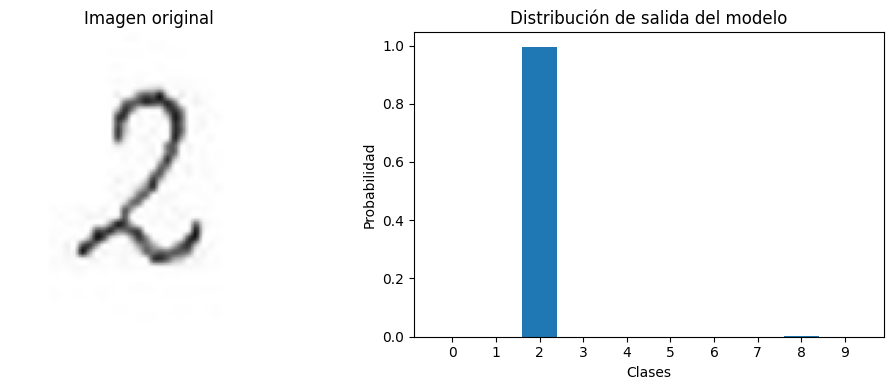

In [44]:
predecir_desde_ruta("normal/2.png", model)

Comentario : El modelo infirio con una muy alta probabilidad de 99.55% que se trataba de un 2 a diferencia del resto de clases, en este caso la diferencia entre la probabilidad de inferencia es muy grande.

Imagen del numero 3

Imagen: normal/3.png
Clase predicha: 3
Distribución de probabilidades: [5.85334192e-07 7.86191449e-05 1.19293045e-05 9.99577582e-01
 3.09784298e-07 7.85647280e-05 2.04281349e-07 7.35059875e-05
 7.12540932e-05 1.07380336e-04]


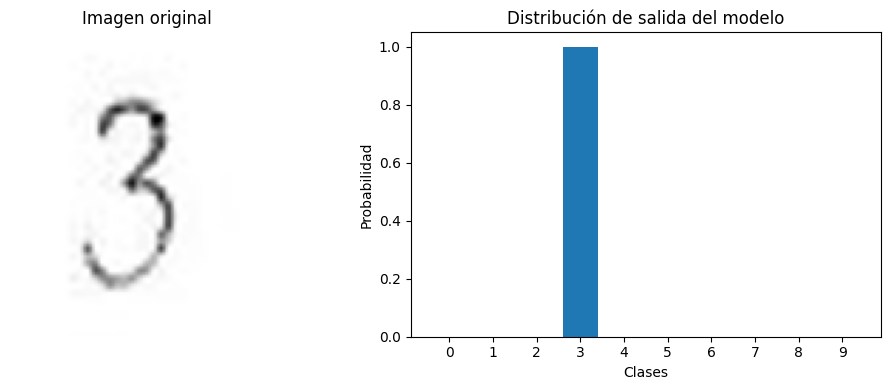

In [46]:
predecir_desde_ruta("normal/3.png", model)

Comentario : El modelo infirio con una muy alta probabilidad de 99.98% que se trataba de un 3 a diferencia del resto de clases, en este caso la diferencia entre la probabilidad de inferencia es muy grande,incluso un poco mas grande que el anterior.

Imagen del numero 4

Imagen: normal/4.png
Clase predicha: 4
Distribución de probabilidades: [2.5970858e-06 4.8804367e-01 1.4164241e-04 8.9933637e-06 5.0558424e-01
 1.2503003e-05 1.6296872e-05 5.7167783e-03 4.0357572e-05 4.3302684e-04]


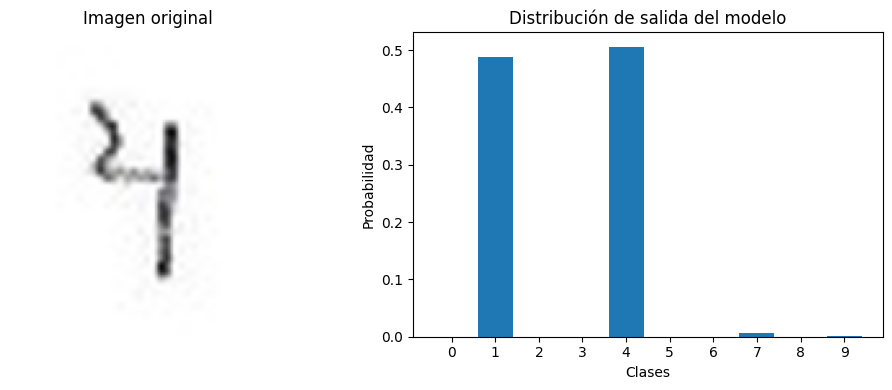

In [47]:
predecir_desde_ruta("normal/4.png", model)

Comentario : En este caso en particular el modelo acertó al predecir que la imagen corresponde al dígito 4, pero lo hizo con una confianza apenas superior al 50.55% , mientras que la clase 1 obtuvo una probabilidad muy cercana con 48.8%. Esto indica que el modelo tuvo dudas entre ambas clases, quizas por alguna pequeña similitud entre el numero 1 y el numero 4.

Imagen numero 5


c:\Users\frank\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Imagen: normal/5.png
Clase predicha: 5
Distribución de probabilidades: [3.6851335e-03 2.9652148e-05 3.4820081e-05 2.5125772e-02 1.6517912e-04
 7.9705572e-01 3.0859467e-03 3.5889436e-05 7.7339313e-03 1.6304795e-01]


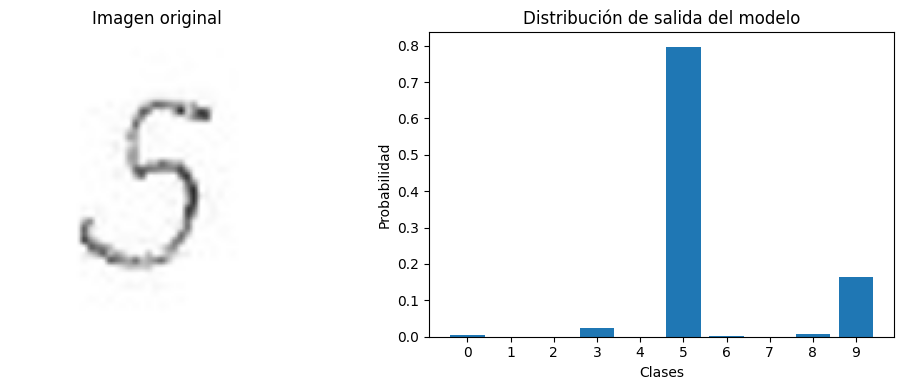

In [48]:
predecir_desde_ruta("normal/5.png", model)

Comentario:En este caso, el modelo acertó al predecir que la imagen corresponde al dígito 5, con una alta confianza del 79.7%. La segunda clase más probable fue el 9, con un 16.3%, lo cual muestra que el modelo fue bastante seguro en su decisión, aunque aún existe una pequeña posibilidad de confusión con el 9.

Imagen numero 6

Imagen: normal/6.png
Clase predicha: 6
Distribución de probabilidades: [2.7690073e-02 1.1855381e-06 2.7555583e-05 6.9967828e-05 2.3818790e-04
 8.0351168e-03 9.4819993e-01 1.1931351e-06 1.3117750e-02 2.6189990e-03]


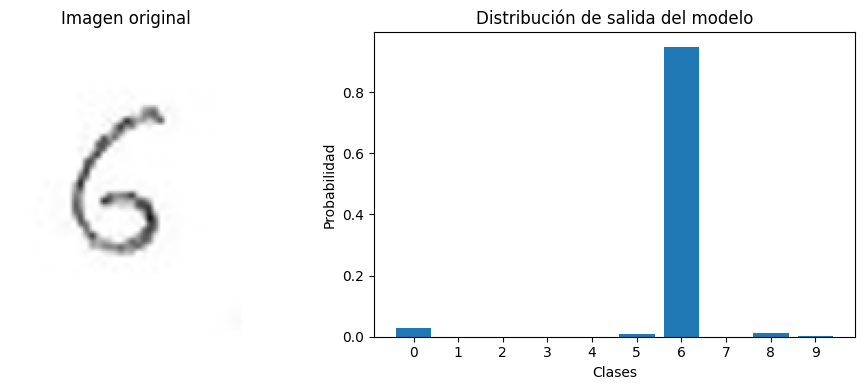

In [49]:
predecir_desde_ruta("normal/6.png", model)

Comentario:El modelo acertó al predecir que la imagen corresponde al dígito 6, con una altísima confianza del 94.82%. El resto de clases tienen probabilidades considerablemente menores, lo que indica que el modelo no tuvo dudas significativas al realizar esta predicción.

Imagen numero 7

Imagen: normal/7.png
Clase predicha: 7
Distribución de probabilidades: [5.1621333e-05 3.1066284e-01 8.0838846e-03 3.2908343e-02 2.5161650e-02
 4.2496360e-04 7.4801507e-04 6.1730826e-01 3.4264696e-03 1.2238957e-03]


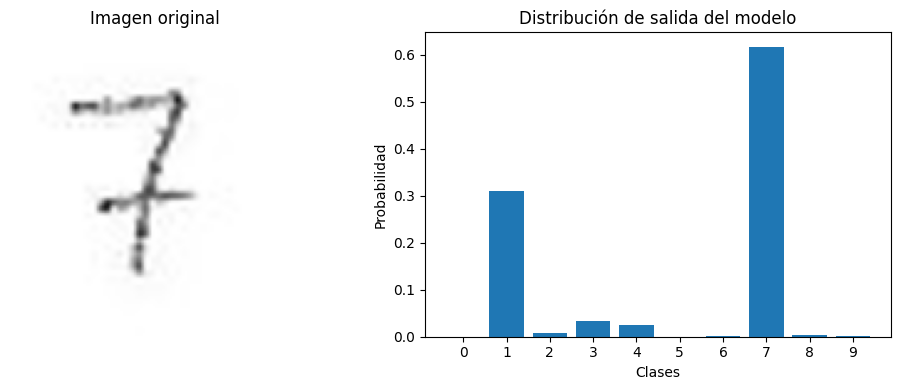

In [50]:
predecir_desde_ruta("normal/7.png", model)

Comentario:El modelo acertó al predecir que la imagen corresponde al dígito 7, con una alta probabilidad del 61.73%. La segunda clase con mayor probabilidad fue la clase 1 con un 31.06%, lo que indica que el modelo tuvo cierta confusión entre ambas clases, aunque la diferencia no es grande.

Imagen numero 8

Imagen: normal/8.png
Clase predicha: 8
Distribución de probabilidades: [1.0679560e-03 2.0247466e-05 8.9150126e-05 2.6212449e-04 3.5966994e-04
 3.2604474e-04 1.2937731e-03 3.4994707e-06 9.9622089e-01 3.5672670e-04]


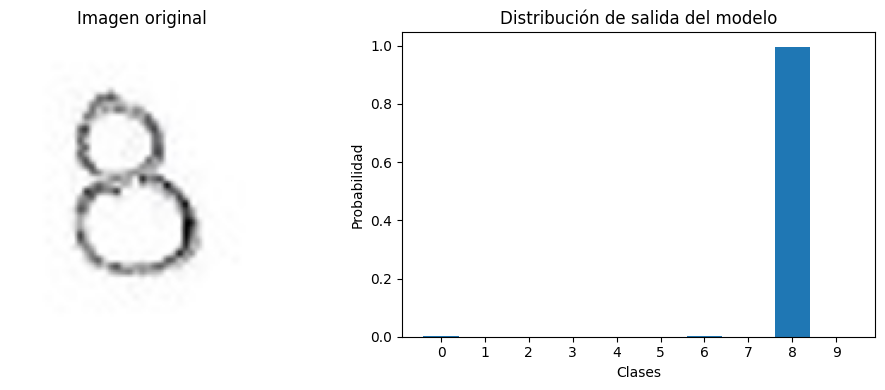

In [51]:
predecir_desde_ruta("normal/8.png", model)

Comentario: El modelo acertó al predecir que la imagen corresponde al dígito 8, con una alta probabilidad del 99.62%, mientras que las otras clases tienen una probabilidad mas que baja, quizas por la diferencia que tiene el numero 8 en el tema de la escritura como tal ante otros numeros.

Imagen numero 9

Imagen: normal/9.png
Clase predicha: 9
Distribución de probabilidades: [5.05983626e-05 4.00316063e-03 2.96625978e-04 1.10557885e-04
 9.46603343e-02 1.18381897e-04 2.43670802e-05 4.43966221e-03
 1.86232254e-02 8.77673149e-01]


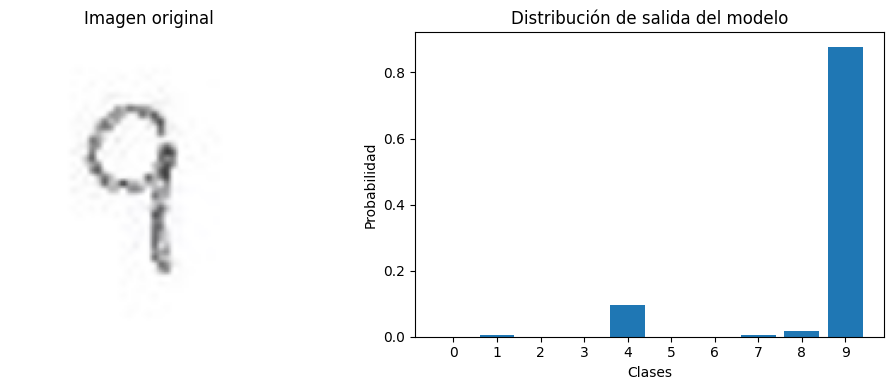

In [52]:
predecir_desde_ruta("normal/9.png", model)

Comentario:El modelo acertó al predecir que la imagen corresponde al dígito 9, con una alta probabilidad del 87.77%. La segunda clase con mayor probabilidad fue la clase 4, con un 9.47%, lo que sugiere que el modelo tuvo cierta confusión entre el dígito 9 y el 4 por la manera en que se escriben.

# Imágenes que no son de ninguna clase (x10).

Imagen: sin_clase/a.png
Clase predicha: 4
Distribución de probabilidades: [0.01109152 0.02389143 0.02503959 0.01637482 0.54103523 0.00533943
 0.00335065 0.0481302  0.0857807  0.23996642]


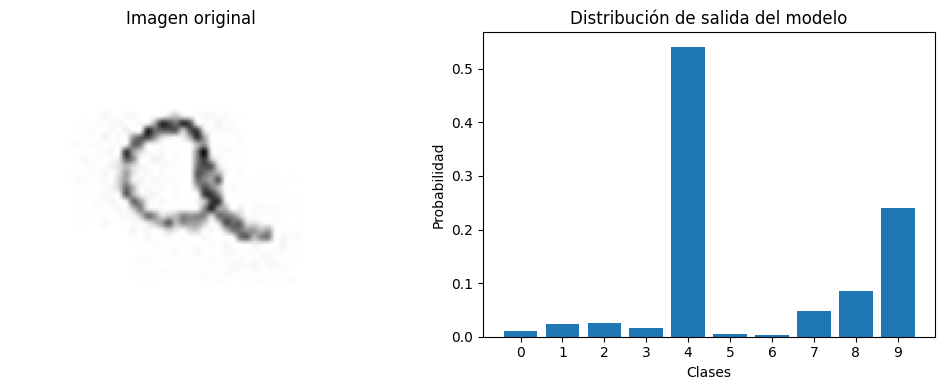

In [54]:
predecir_desde_ruta("sin_clase/a.png", model)

El modelo predijo que la imagen de la letra "a" corresponde al dígito 4, con una probabilidad del 54.10%. Sin embargo, las probabilidades para las clases 9 del 23.99% y 8 con 8.58% también son relativamente altas, lo que indica una considerable incertidumbre., quizas por el parecido de la a con el 4 o 9, ademas que por la escritura tambien cuenta como un borde cerrado por asi decirlo, de manera similar a una parte del 8.

Imagen: sin_clase/AA.png
Clase predicha: 4
Distribución de probabilidades: [5.8816042e-04 1.1161830e-01 2.5883811e-03 5.0238008e-04 8.2590425e-01
 5.0810567e-04 1.1046804e-03 1.4647880e-03 3.9396198e-03 5.1781300e-02]


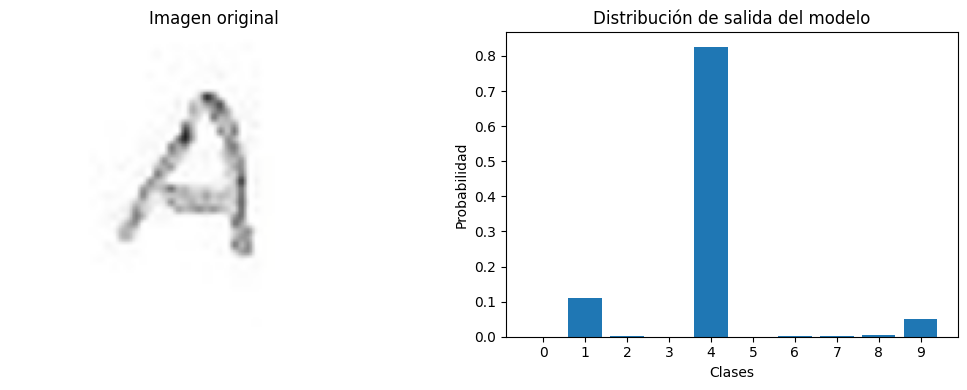

In [55]:
predecir_desde_ruta("sin_clase/AA.png", model)

De manera similar al anterior ejercicio, en este caso con la letra "A", el modelo predijo que es el clase 4 con un alto valor de probabilidad.

Imagen: sin_clase/beta.png
Clase predicha: 9
Distribución de probabilidades: [1.3654315e-02 3.4730384e-04 6.8652217e-04 4.8690138e-04 2.5922121e-02
 8.1260630e-04 1.0484024e-03 5.0395110e-04 1.0612461e-01 8.5041314e-01]


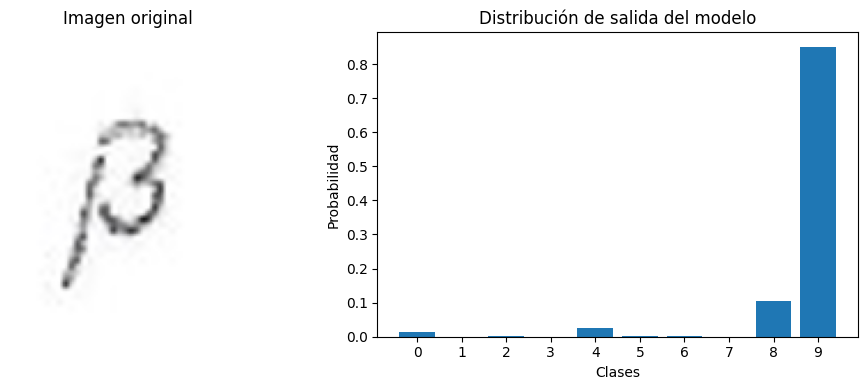

In [56]:
predecir_desde_ruta("sin_clase/beta.png", model)

El modelo predijo que la imagen de el simbolo beta corresponde al dígito 9,seguidor por el 8 y 4 con una baja cantidad de probabilidad , los patrones similares que tiene el beta al 9 son una linea recta como tal y los bordes semi circulares.

Imagen: sin_clase/c.png
Clase predicha: 9
Distribución de probabilidades: [0.05422525 0.00702789 0.00310694 0.00245086 0.13889457 0.02595102
 0.11437674 0.00235949 0.12697057 0.5246366 ]


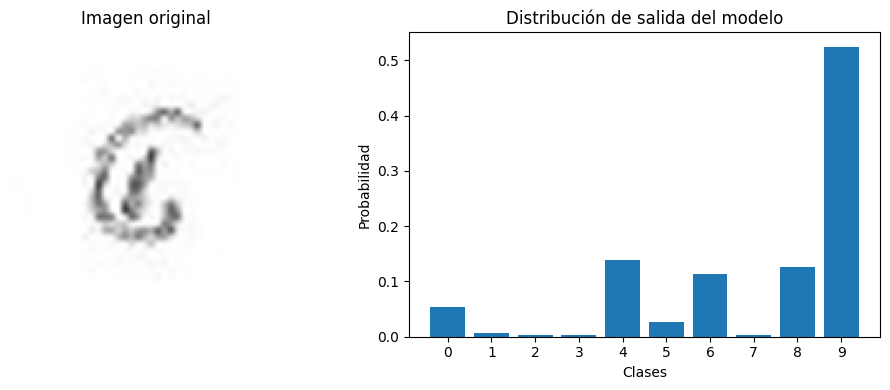

In [57]:
predecir_desde_ruta("sin_clase/c.png", model)

 El modelo no está completamente seguro y algunas características de la "c" podrían estar siendo confundidas con rasgos visuales de los dígitos 4, 8 o 9.

Imagen: sin_clase/casa.png
Clase predicha: 8
Distribución de probabilidades: [2.0692943e-02 1.3251403e-04 1.6389451e-03 2.1671233e-04 1.0741496e-03
 7.4137637e-04 2.0897860e-02 1.2204226e-04 9.4802195e-01 6.4615081e-03]


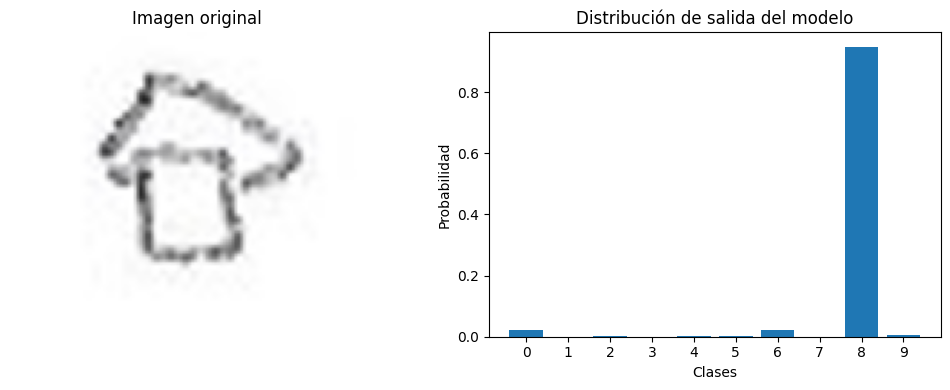

In [59]:
predecir_desde_ruta("sin_clase/casa.png", model)

Como tal el dibujo no representa un número y  el modelo mostró una gran probabilidad respecto a la clase 8. Esto sugiere que los trazos del dibujo,como líneas cerradas o formas simétricas  podrían asemejarse a los del dígito 8. 

Imagen: sin_clase/f.png
Clase predicha: 4
Distribución de probabilidades: [0.01123717 0.0362091  0.03178767 0.00313685 0.6507617  0.0226655
 0.05073817 0.00386712 0.11750549 0.07209124]


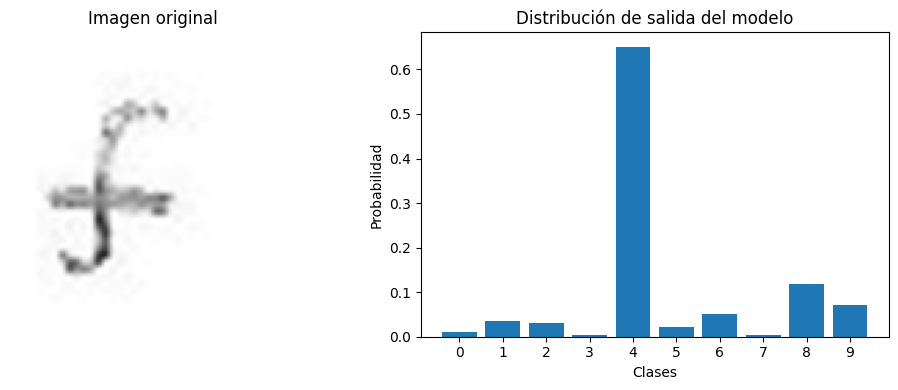

In [60]:
predecir_desde_ruta("sin_clase/f.png", model)

El modelo clasificó la letra "f" como el dígito 4, con una alta probabilidad, lo que sugiere que encontró similitudes en la forma vertical y los trazos cortos característicos de ambos.

Imagen: sin_clase/inf.png
Clase predicha: 4
Distribución de probabilidades: [5.1320917e-03 1.0530987e-02 5.9803459e-03 2.1249291e-03 6.5324217e-01
 5.6449561e-03 1.5681618e-01 2.5282538e-04 1.5677519e-01 3.5002232e-03]


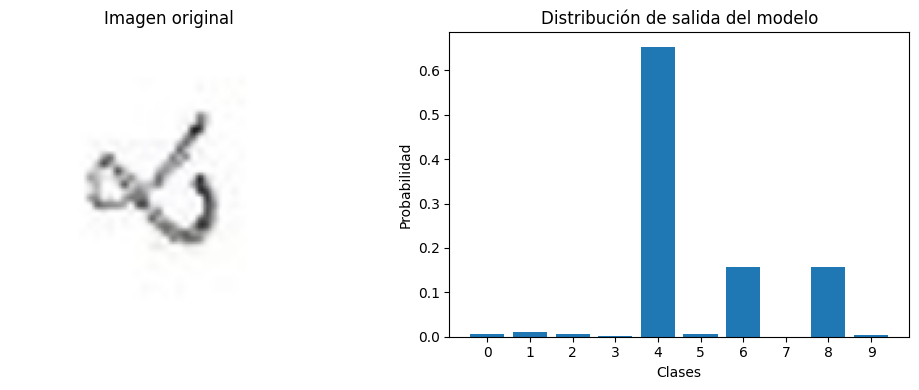

In [61]:
predecir_desde_ruta("sin_clase/inf.png", model)

El modelo clasificó el símbolo de infinito como el dígito 4, con una alta probabilidad . Esto sugiere que interpretó las curvas del símbolo como similares a los trazos del número 4, aunque también mostró cierta confusión con las clases 6 y 8

Imagen: sin_clase/r.png
Clase predicha: 9
Distribución de probabilidades: [0.00330628 0.06813256 0.00344851 0.01488092 0.15596764 0.22221977
 0.00095322 0.13947213 0.01288983 0.37872908]


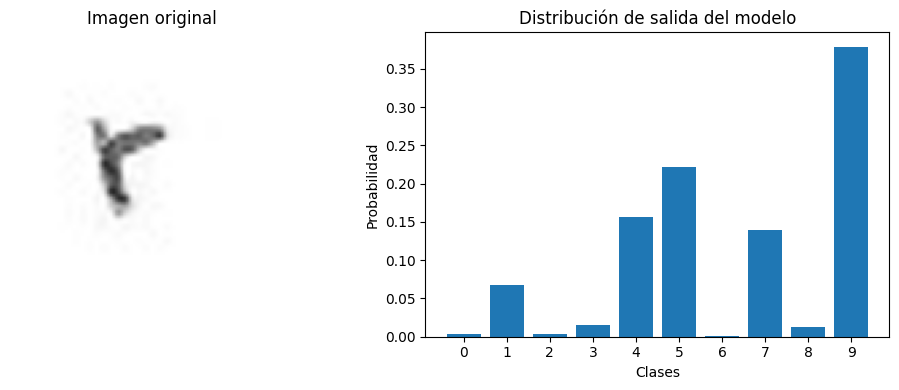

In [62]:
predecir_desde_ruta("sin_clase/r.png", model)

El modelo clasificó la letra "r" como el dígito 9, con una probabilidad mas alta a las demas. Aunque esta fue la clase con mayor probabilidad, otras clases como la 5 , la 4  y la 7  también tuvieron valores relativamente altos, lo que indica que el modelo no tuvo una certeza clara y muestra confusión

Imagen: sin_clase/secret.png
Clase predicha: 9
Distribución de probabilidades: [1.8474957e-03 5.3249393e-04 7.0279418e-04 3.5548634e-03 9.4008811e-02
 4.2035575e-03 1.3093241e-04 9.5285904e-03 1.3754512e-01 7.4794543e-01]


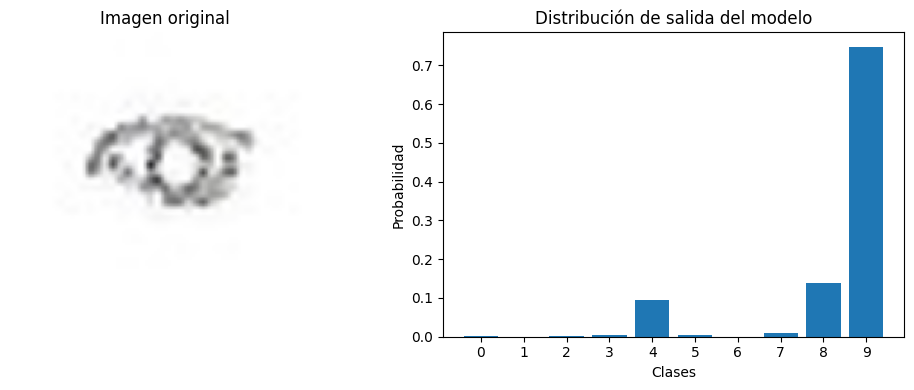

In [63]:
predecir_desde_ruta("sin_clase/secret.png", model)

El modelo predijo que la imagen del ojo corresponde al dígito 9, con una probabilidad dominante. Las siguientes clases con menores probabilidades fueron la clase 4 y la clase 8, aunque con valores significativamente menores. 

Imagen: sin_clase/tita.png
Clase predicha: 9
Distribución de probabilidades: [2.7318422e-02 1.0162834e-03 6.2578270e-04 1.0500853e-03 5.1569581e-02
 1.6711620e-03 5.0352258e-03 7.0473208e-04 2.1986010e-02 8.8902277e-01]


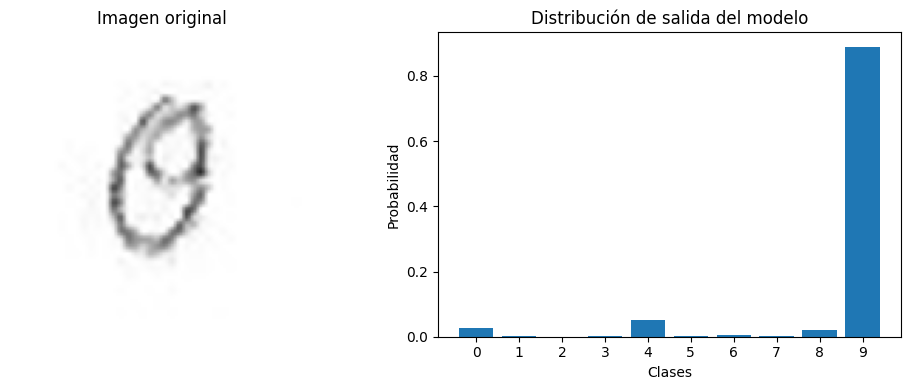

In [64]:
predecir_desde_ruta("sin_clase/tita.png", model)

El modelo predijo que la imagen de "tita" corresponde a la clase 9, con una probabilidad dominante. Las demás clases tienen probabilidades muy bajas, lo que indica que el modelo está bastante seguro de su predicción.